#### HW 4 - Fractionally Differentiated Feaures

1. Generate a time series from an IID Gaussian random process. This is a memoryless, stationary series:
(a) Compute the ADF statistic on this series. What is the p-value?
(b) Compute the cumulative sum of the observations. This is a non-stationary series
without memory.
    i. What is the order of integration of this cumulative series?
   ii. Compute the ADF statistic on this series. What is the p-value?
(c) Differentiate the series twice. What is the p-value of this over-differentiated series?

In [28]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss


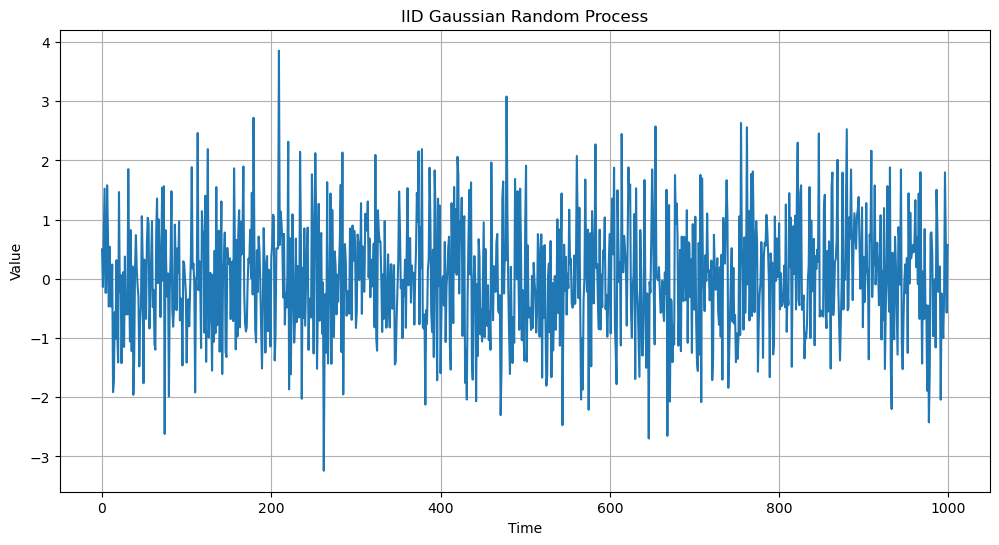

In [29]:
# set random seed
np.random.seed(42)

# generate IID Gaussian random process
n = 1000
mean = 0
std = 1

# generate IID Gaussian random process
iid_process = np.random.normal(mean, std, n)

# create a time series
time_series = pd.Series(iid_process)

# plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('IID Gaussian Random Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

In [30]:
# compute ADF statistic on the time series
adf_statistic, p_value, _, _, critical_values, _ = adfuller(time_series)
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:', critical_values)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


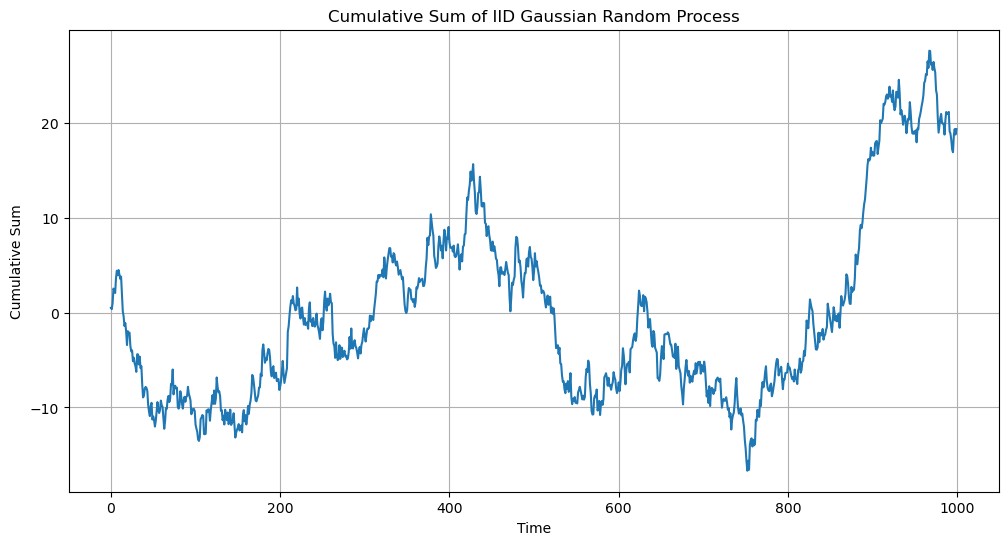

In [31]:
# compute cumulative sum of the observations
cumulative_sum = time_series.cumsum()
# plot the cumulative sum
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum)
plt.title('Cumulative Sum of IID Gaussian Random Process')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.grid()
plt.show()

In [32]:
# compute ADF statistic on the cumulative sum
adf_statistic_cumsum, p_value_cumsum, _, _, critical_values_cumsum, _ = adfuller(cumulative_sum)
print('ADF Statistic (Cumulative Sum):', adf_statistic_cumsum)
print('p-value (Cumulative Sum):', p_value_cumsum)
print('Critical Values (Cumulative Sum):', critical_values_cumsum)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [33]:
# creating a function to compute the order of integration

# Function to determine the order of integration
def find_order_of_integration(series, significance_level=0.05):
    order = 0
    while True:
        adf_stat, p_value, _, _, _, _ = adfuller(series)
        if p_value < significance_level:
            break
        series = series.diff().dropna()  # Take the difference
        order += 1
    return order


In [34]:
# compute the order of integration of the cumulative sum
order = find_order_of_integration(cumulative_sum)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [35]:
#viewing the order of integration
print('Order of Integration:', order)

Order of Integration: 1


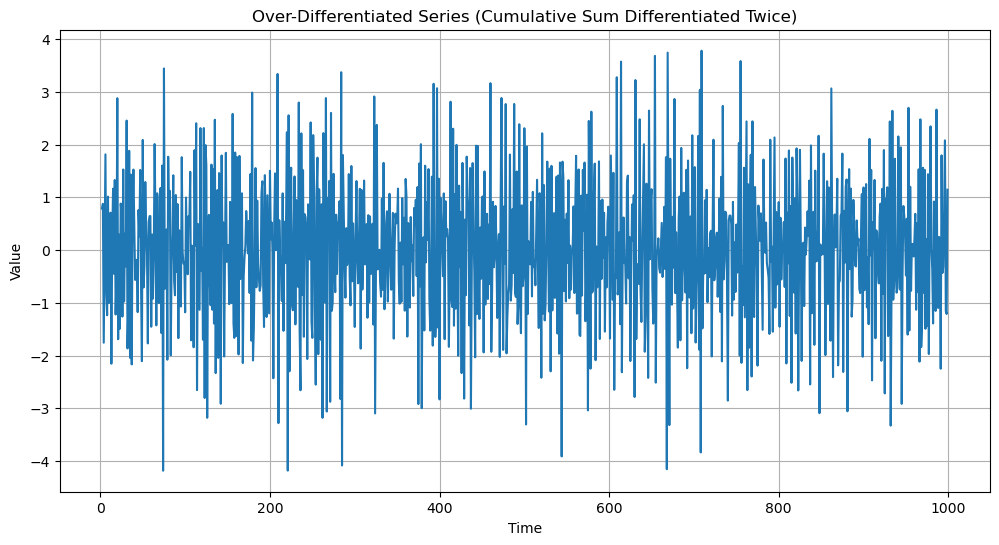

In [36]:
# create a new series by differentiating the cumulative sum twice
over_differentiated_series = cumulative_sum.diff().diff().dropna()
# plot the over-differentiated series
plt.figure(figsize=(12, 6))
plt.plot(over_differentiated_series)
plt.title('Over-Differentiated Series (Cumulative Sum Differentiated Twice)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

In [37]:
# getting the ADF statistic on the over-differentiated series
adf_statistic_over_diff, p_value_over_diff, _, _, critical_values_over_diff, _ = adfuller(over_differentiated_series)
print('ADF Statistic (Over-Differentiated Series):', adf_statistic_over_diff)
print('p-value (Over-Differentiated Series):', p_value_over_diff)
print('Critical Values (Over-Differentiated Series):', critical_values_over_diff)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2. Generate a time series that follows a sinusoidal function. This is a stationary series
with memory.
(a) Compute the ADF statistic on this series. What is the p-value?
(b) Shift every observation by the same positive value. Compute the cumulative sum
of the observations. This is a non-stationary series with memory.
i. Compute the ADF statistic on this series. What is the p-value?
ii. Apply an expanding window fracdff, with t = 1E-2. For what minimum d
value do you get a p-value below 5%?
iii. Apply FFD, with t = 1E-5: For what minimum d value do you get a p-value
below 5%?


In [38]:
# importing mfinance libraries

from dotenv import load_dotenv

# Load environment variables
load_dotenv('../config.env')

# import libraries
from mlfinlab.features.fracdiff import frac_diff


In [ ]:
# creating a sinusoidal function
# set parameters
n = 1000
frequency = 0.01
amplitude = 1

# generate time series data
time = np.arange(n)
sinusoidal_series = amplitude * np.sin(2 * np.pi * frequency * time)

# create a pandas series
sinusoidal_series = pd.Series(sinusoidal_series)

# plot the sinusoidal series
plt.figure(figsize=(12, 6))
plt.plot(sinusoidal_series)
plt.title('Sinusoidal Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()


In [146]:
# computing the ADF statistic and P-value on the sinusoidal series
adf_statistic_sinusoidal, p_value_sinusoidal, _, _, critical_values_sinusoidal, _ = adfuller(sinusoidal_series)
print('ADF Statistic (Sinusoidal Series):', adf_statistic_sinusoidal)
print('p-value (Sinusoidal Series):', p_value_sinusoidal)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


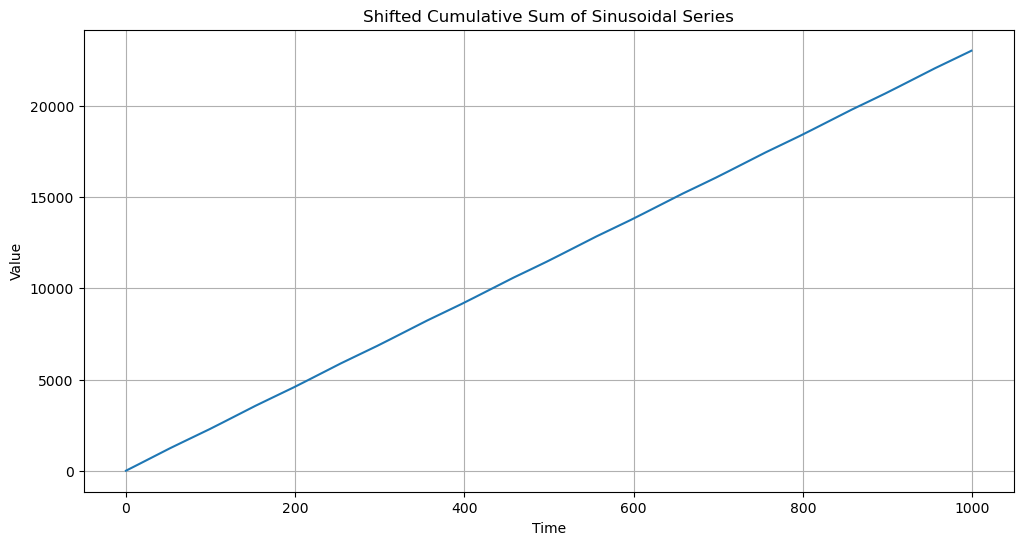

In [40]:
# creating a stationary series with memory by shfiting the sinusoidal series by the same positive value and creating a cumulative sum
shift_value = 23
shifted_series = sinusoidal_series + shift_value
cumulative_sum_shifted = shifted_series.cumsum()

# plot the shifted series
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum_shifted)
plt.title('Shifted Cumulative Sum of Sinusoidal Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

In [41]:
# testing out the fracdiff function with the shifted series

# naming the shifted series column 'close'
cumulative_sum_shifted = pd.DataFrame(cumulative_sum_shifted, columns=['close'])

# viewing head of the shifted series
cumulative_sum_shifted.head()

,close
0,23.000000
1,46.062791
2,69.188124
3,92.375505
4,115.624195


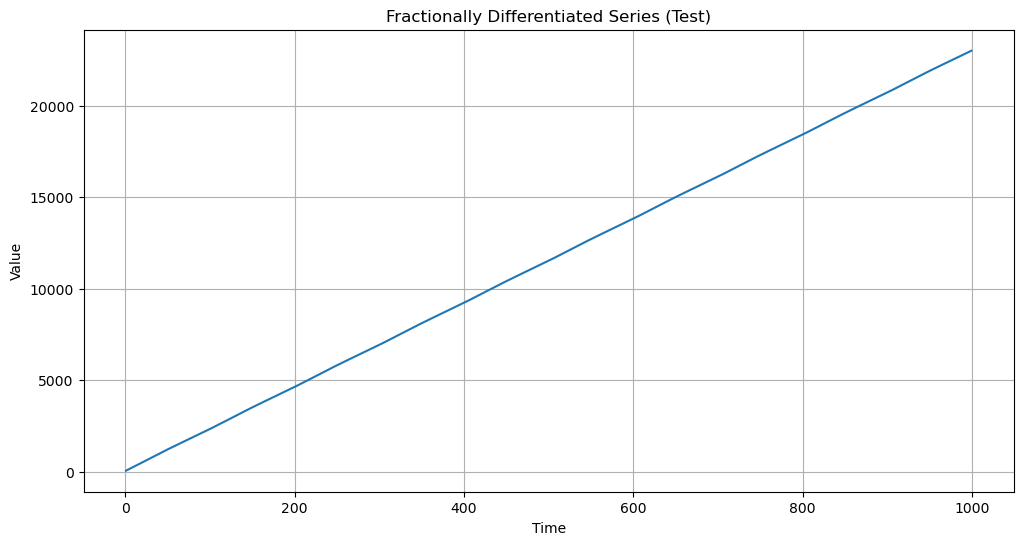

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [169]:
# applying the fracdiff function
t=1E-2
d =9E-11
# apply fracdiff
frac_diff_series_test = frac_diff(cumulative_sum_shifted, d, t)

# making sure there are not NaN values in the series and no infinite values
frac_diff_series_test = frac_diff_series_test.dropna()
frac_diff_series_test = frac_diff_series_test[~np.isinf(frac_diff_series_test)]

# plot the fracdiff series
plt.figure(figsize=(12, 6))
plt.plot(frac_diff_series_test)
plt.title('Fractionally Differentiated Series (Test)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

# getting the ADF statistic on the fracdiff series
adf_statistic_frac_diff, p_value_frac_diff, _, _, critical_values_frac_diff, _ = adfuller(frac_diff_series_test)
print('ADF Statistic (Fractionally Differentiated Series):', adf_statistic_frac_diff)
print('p-value (Fractionally Differentiated Series):', p_value_frac_diff)
print('Critical Values (Fractionally Differentiated Series):', critical_values_frac_diff)



In [43]:
# finding the d value for the minimum d value that gives a p-value below 5%
target_ADF= -2.872304928618605
target_p_value = 0.05

# setting the parameters for the fracdiff function
start_d = 0.0
end_d = 1.0
step_d = 1E-10

# creating a list to store the results
results = [] # resulting ADF statistics
d_values = [] # resulting d values

# creating function to find the minimum d value by looping through the d values as per step_d. The function works as follows:
    # 1. input dataset and parameters that are target_ADF, start_d, end_d and step_d, t (t=1E-2 as default)
    # 2. the function will iterate through d value starging from the start_d to end_d by each step_d
    # 3. for each value of d, the function will apply the fracdiff function (t defined above) and get the ADF statistic, it will append the ADF statistic to the results list and the d_values to the d_values list
    # 4. the function will stop iterating once the ADF statistic is less than the target_ADF
    # 5. the function will return the d value and the ADF statistic

def find_minimum_d(series, target_ADF, start_d, end_d, step_d, t=1E-2):
    d = start_d
    while d <= end_d:
        # apply fracdiff
        frac_diff_series = frac_diff(series, d, t)

        # making sure there are not NaN values in the series and no infinite values
        frac_diff_series = frac_diff_series.dropna()
        frac_diff_series = frac_diff_series[~np.isinf(frac_diff_series)]

        # getting the ADF statistic on the fracdiff series
        adf_statistic, p_value, _, _, critical_values, _ = adfuller(frac_diff_series)

        # append the results to the lists
        results.append(adf_statistic)
        d_values.append(d)

        # check if the ADF statistic is less than the target ADF statistic
        if adf_statistic < target_ADF:
            break

        # increment d by step_d
        d += step_d

    return d, adf_statistic






In [44]:
# running the find_minimum_d function with the 'cumulative_sum_shifted'
find_minimum_d(cumulative_sum_shifted, target_ADF, start_d, end_d, step_d)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(4e-10, -6.810774098582203)

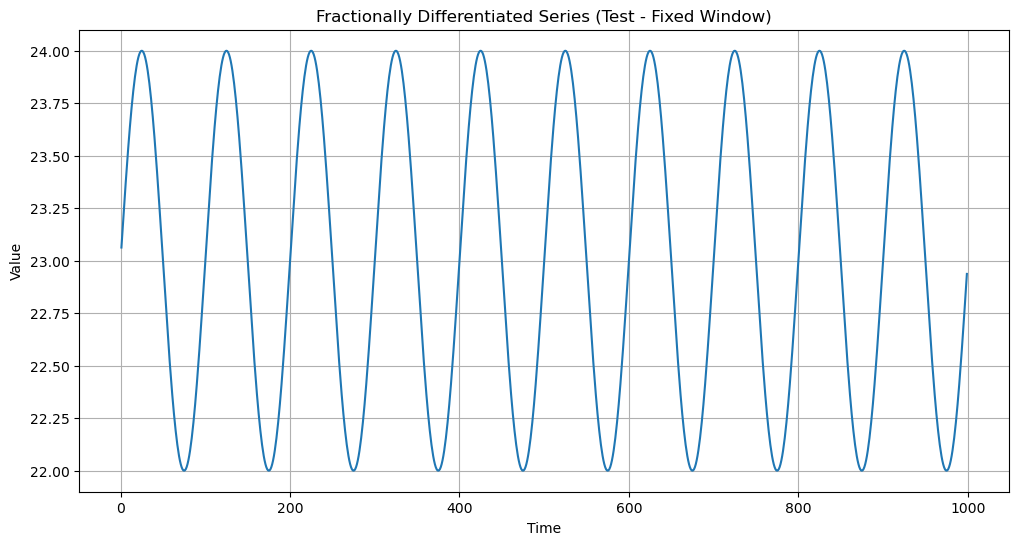

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [188]:
# applying the fixed window fracdiff function in the same manner as above. First testing the function with the shifted series then using a function to find the minimum d value

# importing the fracdiff function with fixed window
from mlfinlab.features.fracdiff import frac_diff_ffd, plot_min_ffd

# setting the parameters for the fracdiff function
t_ffd=1E-5
d_ffd = 1 - 1E-12

# testing the fracdiff_ffd function with above value and cumulative_sum_shifted
# apply fracdiff_ffd
frac_diff_ffd_series_test = frac_diff_ffd(cumulative_sum_shifted, d_ffd, t_ffd)
# making sure there are not NaN values in the series and no infinite values
frac_diff_ffd_series_test = frac_diff_ffd_series_test.dropna()
frac_diff_ffd_series_test = frac_diff_ffd_series_test[~np.isinf(frac_diff_ffd_series_test)]
# plot the fracdiff_ffd series
plt.figure(figsize=(12, 6))
plt.plot(frac_diff_ffd_series_test)
plt.title('Fractionally Differentiated Series (Test - Fixed Window)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()
# getting the ADF statistic on the fracdiff_ffd series
adf_statistic_frac_diff_ffd, p_value_frac_diff_ffd, _, _, critical_values_frac_diff_ffd, _ = adfuller(frac_diff_ffd_series_test)
print('ADF Statistic (Fractionally Differentiated Series - Fixed Window):', adf_statistic_frac_diff_ffd)
print('p-value (Fractionally Differentiated Series - Fixed Window):', p_value_frac_diff_ffd)
print('Critical Values (Fractionally Differentiated Series - Fixed Window):', critical_values_frac_diff_ffd)

3. Take the series from exercise 2(b) above:
(a) Fit the series to a sine function. What is the R-squared?
(b) Apply FFD(d = 1). Fit the series to a sine function. What is the R-squared?
(c) What value of d maximizes the R-squared of a sinusoidal  t on FFD(d): Why?

In [46]:
# creating a copy of the cumulative_sum_shifted series

ex3_series = cumulative_sum_shifted.copy()

# viewing the head of the series
ex3_series.head()

,close
0,23.000000
1,46.062791
2,69.188124
3,92.375505
4,115.624195


In [ ]:
# creating a a series using the fracdiff function with d=1 and fixed window
d = 1
# apply fracdiff_ffd
ex3_series_ffd = frac_diff_ffd(ex3_series, d, t_ffd)

# dropping any NA values and infinite values
ex3_series_ffd = ex3_series_ffd.dropna()
ex3_series_ffd = ex3_series_ffd[~np.isinf(ex3_series_ffd)]


# viewing the head of the series
ex3_series_ffd.head()


In [48]:
# creating a function to fit the sine function to the series and calculate R^2

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# Define the sine function
def sine_func(x, A, omega, phi, offset):
    return A * np.sin(omega * x + phi) + offset

# Function to fit sine and calculate R^2
def fit_sine_and_calculate_r2(df):
    # Extract x and y from the DataFrame
    x = df.index.values
    y = df['close'].values

    # Fit the sine function to the data
    params, _ = curve_fit(sine_func, x, y, p0=[1, 0.01, 0, np.mean(y)])

    # Calculate the fitted values
    y_fitted = sine_func(x, *params)

    # Calculate R^2
    r_squared = r2_score(y, y_fitted)

    # Plot the actual vs fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Actual', alpha=0.7)
    plt.plot(x, y_fitted, label='Fitted (Sine)', linestyle='--')
    plt.title('Sine Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

    return params, r_squared

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


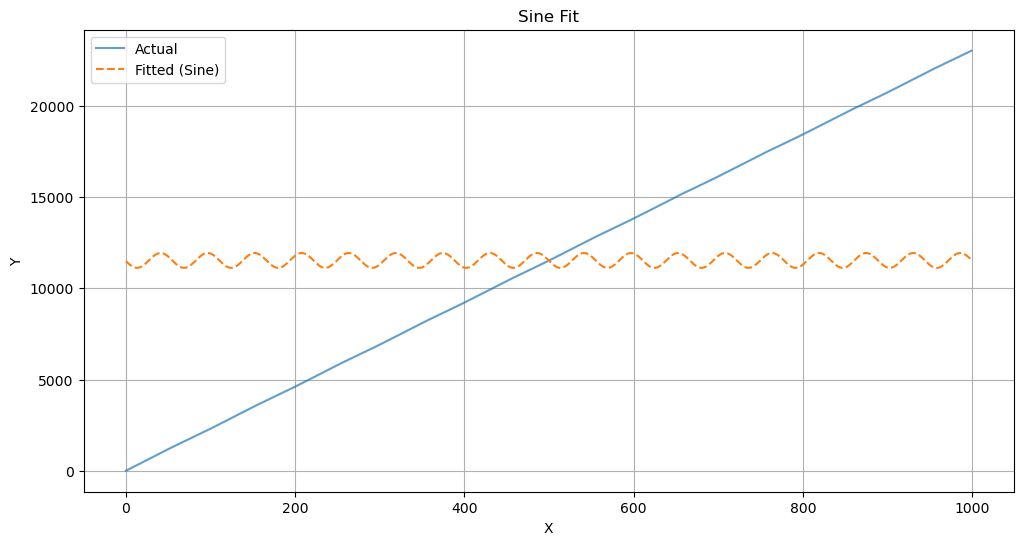

R-squared (Original Series): 0.0018796332779418279
Sine Function Parameters (Original Series): [-4.06988232e+02 -1.13044919e-01 -5.97733265e+01  1.15274101e+04]


In [49]:
# fitting the sine function to the original series
params, r_squared = fit_sine_and_calculate_r2(ex3_series)
print('R-squared (Original Series):', r_squared)
print('Sine Function Parameters (Original Series):', params)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


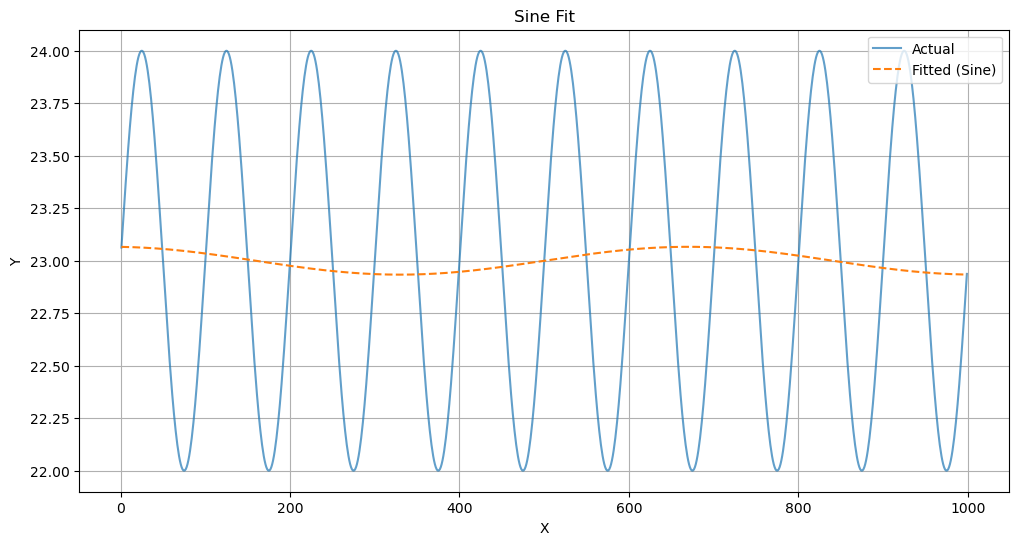

R-squared (Fractionally Differentiated Series): 0.004289361161722072
Sine Function Parameters (Fractionally Differentiated Series): [6.62775198e-02 9.22468348e-03 1.67084451e+00 2.30000000e+01]


In [50]:
# fitting the sine function to the fractionally differentiated series
params_ffd, r_squared_ffd = fit_sine_and_calculate_r2(ex3_series_ffd)
print('R-squared (Fractionally Differentiated Series):', r_squared_ffd)
print('Sine Function Parameters (Fractionally Differentiated Series):', params_ffd)

In [144]:
# creating a function to find the d value that maximizes the R-squared value

d = 0.71
# apply fracdiff_ffd
ex3_series_max = frac_diff_ffd(ex3_series, d, t_ffd)

# dropping any NA values and infinite values
ex3_series_max = ex3_series_max.dropna()
ex3_series_max = ex3_series_max[~np.isinf(ex3_series_max)]


# viewing the head of the series
ex3_series_ffd.head()


,close
1,23.062791
2,23.125333
3,23.187381
4,23.248690
5,23.309017


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


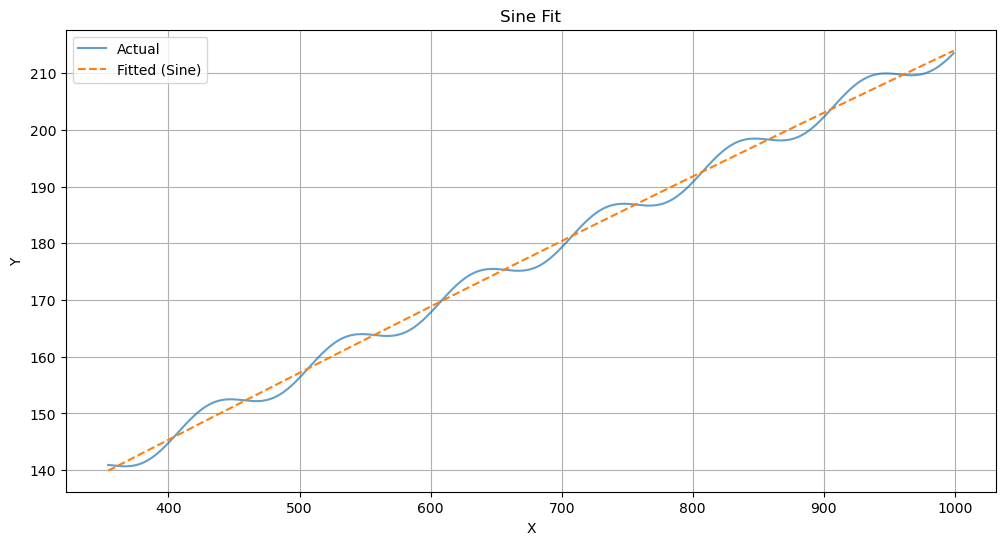

R-squared (Maximized R-squared Series): 0.994715356007519
Sine Function Parameters (Maximized R-squared Series): [ 2.98555893e+02 -4.04954190e-04 -3.17727013e+00  8.67359034e+01]


In [145]:
# fitting the ex3_series_max to the sine function
params_max, r_squared_max = fit_sine_and_calculate_r2(ex3_series_max)
print('R-squared (Maximized R-squared Series):', r_squared_max)
print('Sine Function Parameters (Maximized R-squared Series):', params_max)